In [43]:
# Exercise 1
import torch
import torch.optim as optim # See https://pytorch.org/docs/stable/optim.html
from torch.nn.parameter import Parameter # See https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html


# Initialize a starting point
params = torch.rand(2) # See https://pytorch.org/docs/stable/generated/torch.rand.html
params = Parameter(params)
print(params)

Parameter containing:
tensor([0.3317, 0.0725], requires_grad=True)


In [44]:
# Reverse mode automatic differentiation
OPTIMIZER = optim.SGD([params], lr = 0.1)
num_it = 100

def function(params):
    X = params[0]
    Y = params[1]
    Z = torch.exp(-(X+1)**2-Y**2)*(Y-1)**2 - torch.exp(-(Y+1)**2-X**2) + torch.exp(-X**2-Y**2)*(Y**5+X**3)
    return Z
    
for i in range(num_it):
    if i%10 == 0:
        print(i,params)

    loss = function(params)
    
    # Wipe up gradient in the previous step
    OPTIMIZER.zero_grad() 
    
    # Computes the gradient of current tensor w.r.t. graph leaves.
    loss.backward() 
    
    # Updates the parameters
    OPTIMIZER.step()

0 Parameter containing:
tensor([0.3317, 0.0725], requires_grad=True)
10 Parameter containing:
tensor([ 0.3418, -0.3022], requires_grad=True)
20 Parameter containing:
tensor([ 0.2700, -1.2544], requires_grad=True)
30 Parameter containing:
tensor([ 0.1410, -1.4739], requires_grad=True)
40 Parameter containing:
tensor([ 0.1368, -1.4768], requires_grad=True)
50 Parameter containing:
tensor([ 0.1367, -1.4768], requires_grad=True)
60 Parameter containing:
tensor([ 0.1367, -1.4768], requires_grad=True)
70 Parameter containing:
tensor([ 0.1367, -1.4768], requires_grad=True)
80 Parameter containing:
tensor([ 0.1367, -1.4768], requires_grad=True)
90 Parameter containing:
tensor([ 0.1367, -1.4768], requires_grad=True)


In [45]:
#Modify the following code to verify the correct of your code
from scipy import optimize
import numpy as np

def np_function(params):
    X = params[0]
    Y = params[1]
    return np.exp(-(X+1)**2-Y**2)*(Y-1)**2 - np.exp(-(Y+1)**2-X**2) + np.exp(-X**2-Y**2)*(Y**5+X**3)

print(optimize.brute(np_function, ((-4,4),(-4,4))))

[ 0.13659545 -1.47682506]


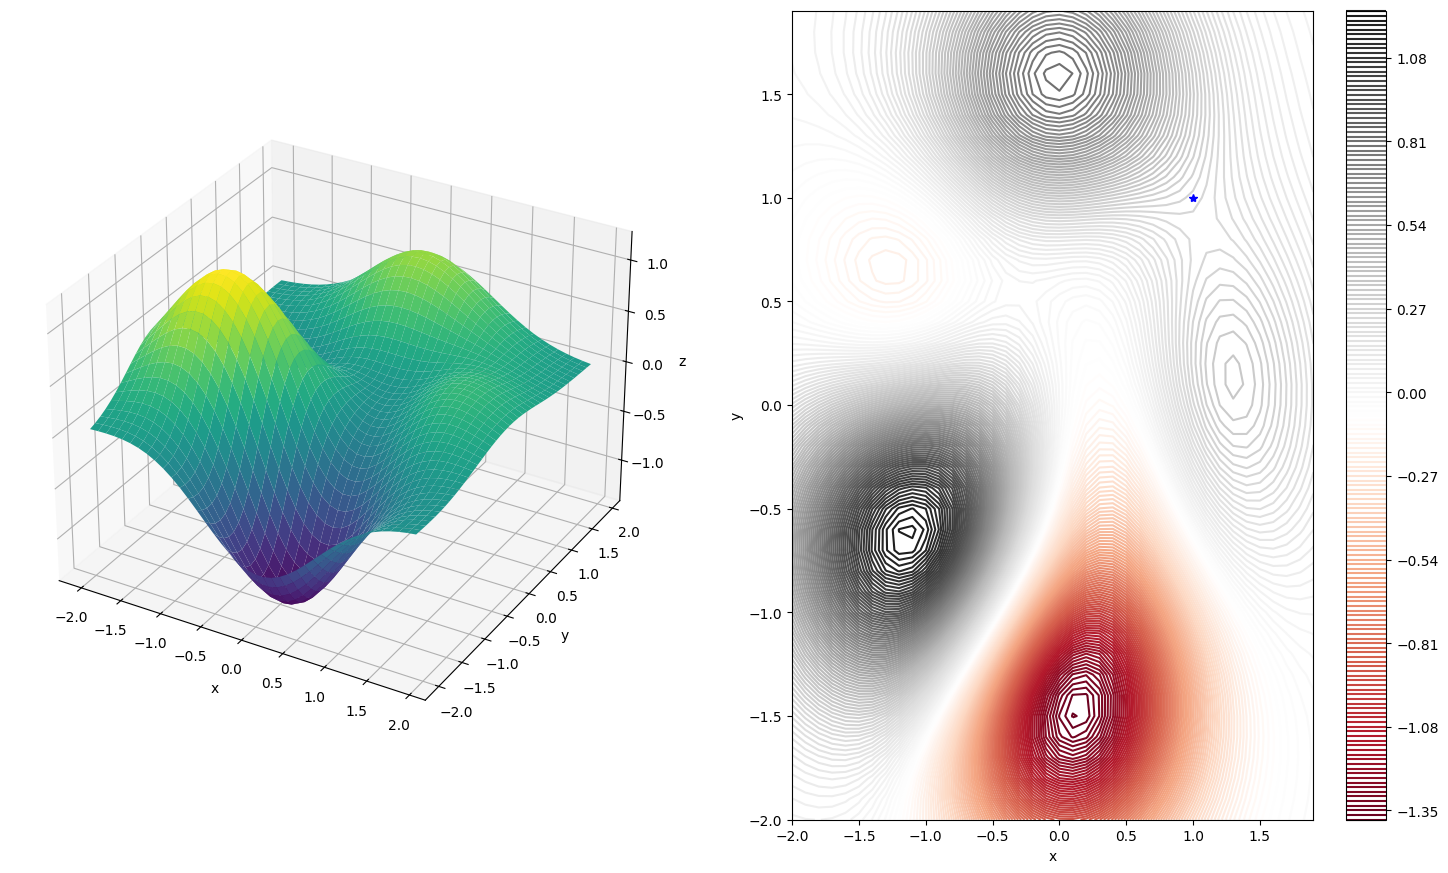

In [46]:
from matplotlib import cm
import matplotlib.pyplot as plt

x_range = np.arange(-2.0, 2.0, 0.1)
y_range = np.arange(-2.0, 2.0, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = np.exp(-(X+1)**2-Y**2)*(Y-1)**2 - np.exp(-(Y+1)**2-X**2) + np.exp(-X**2-Y**2)*(Y**5+X**3)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)
fig.set_size_inches(18.5, 10.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax2 = fig.add_subplot(1, 2, 2)
countour = ax2.contour(X, Y, Z, 200, cmap='RdGy')
fig.colorbar(countour)
ax2.plot(1,1,'*',color='blue')

ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

In [49]:
# Classification for 4 and 9

from torchvision import datasets
import torchvision.transforms as transforms
import torch

### dataset for training parameters
train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
### dataset for testing the accuracy of the trained parameters
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

print('train dataset size:',len(train_dataset.data))
print('test dataset size:',len(test_dataset.data))

In [ ]:
'''
Choose two numbers and prepare datasets with two numbers.
'''
nb1 = 4
nb2 = 9

train_dataset.data = torch.cat([train_dataset.data[(train_dataset.targets == nb1)],train_dataset.data[(train_dataset.targets == nb2)]],dim=0)
train_dataset.targets = torch.cat([train_dataset.targets[(train_dataset.targets == nb1)],train_dataset.targets[(train_dataset.targets == nb2)]],dim=0)

train_dataset.targets[(train_dataset.targets == nb1)] = 0
train_dataset.targets[(train_dataset.targets == nb2)] = 1

'''
Do the same thing for the test dataset
'''

test_dataset.data = torch.cat([test_dataset.data[(test_dataset.targets == nb1)],test_dataset.data[(test_dataset.targets == nb2)]],dim=0)
test_dataset.targets = torch.cat([test_dataset.targets[(test_dataset.targets == nb1)],test_dataset.targets[(test_dataset.targets == nb2)]],dim=0)

test_dataset.targets[(test_dataset.targets == nb1)] = 0
test_dataset.targets[(test_dataset.targets == nb2)] = 1

In [ ]:
from torch.nn.parameter import Parameter

''' Define your model '''

class logistic_regression:
    def __init__(self):
      # data_size: 28 * 28
      self.params = Parameter(torch.nn.init.normal_(torch.empty(28*28)))
      self.bias = Parameter(torch.nn.init.normal_(torch.empty(1))[0])

    def forward(self, x):
      x = x.reshape(28*28)

      # normalization
      x = x / 255

      output = self.params.matmul(x.T) + self.bias

      return torch.sigmoid(output)


In [ ]:
''' Choose loss function'''
# https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss
my_loss = torch.nn.BCELoss()

In [ ]:
import random
import torch.optim as optim
''' Define model and optimizer'''
LR_model = logistic_regression()

OPTIMIZER = optim.SGD([LR_model.params] + [LR_model.bias], lr = 1e-1)

num_it = len(train_dataset.data)
# train_dataset.targets = torch.Tensor(train_dataset.targets).reshape(-1, 1)

LR_model.forward(train_dataset.data[0]), train_dataset.targets[0].float()

In [ ]:
# Gradient Discent
for epoch in range(num_it):
    if epoch%1000 == 0:
        print(epoch,params[150:156])

    i = num = random.randrange(1, num_it)

    loss = my_loss(LR_model.forward(train_dataset.data[i]), train_dataset.targets[i].float())                       
#    loss = torch.nn.functional.mse_loss(LR_model.forward(train_dataset.data[i]), train_dataset.targets[i].float()) 

    # Wipe up gradient in the previous step
    OPTIMIZER.zero_grad()

    # Computes the gradient of current tensor w.r.t. graph leaves.
    loss.backward()

    # Updates the parameters
    OPTIMIZER.step()

In [ ]:
### Test for train_dataset
count = 0
for i in range(train_dataset.targets.size()[0]):
    image = train_dataset.data[i]
    label = train_dataset.targets[i]

    prediction = (LR_model.forward(image.float().view(-1, 28*28)) >= torch.FloatTensor([0.5]))
    if prediction == label:
        count += 1

print('total: {}, correctly matched: {}, accuracy: {:.2f}%\n'.format(train_dataset.targets.size()[0], count, count/train_dataset.targets.size()[0] * 100. ) )

In [ ]:
''' Test for test_dataset '''
count = 0
wrong_answer = []
for i in range(test_dataset.targets.size()[0]):
    image = test_dataset.data[i]
    label = test_dataset.targets[i]

    prediction = LR_model.forward(image.float().view(-1, 28*28)) >= torch.FloatTensor([0.5])
    if prediction == label:
        count += 1
    else:
        wrong_answer += [i]

print('total: {}, correctly matched: {} accuracy: {:.2f}%\n'.format(test_dataset.targets.size()[0], count, count/test_dataset.targets.size()[0] * 100. ) )

In [ ]:
'''
Wrong Answers by Our LR_model
'''

import matplotlib.pyplot as plt

for i in range(3):
    image = test_dataset.data[wrong_answer[i]]
    print('0/False means {} and 1/True means {}'.format(nb1,nb2))
    print(test_dataset.targets[wrong_answer[i]], LR_model.forward(image.float().view(-1, 28*28)) >= torch.FloatTensor([0.5]))
    plt.imshow(image, cmap='gray')
    plt.show()